In [40]:
#import
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [3]:
#read data
df=pd.read_excel(r"C:\Users\Hxtreme\Jupyter_Notebook_Learning\Project3_V1\Dataset\liver_data.xlsx")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
#describe
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
#null values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
#duplicates
duplicates=df[df.duplicated()]
duplicates

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [8]:
#drop duplicates
df = df.drop_duplicates().reset_index(drop=True)
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
565,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
566,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
567,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
568,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [9]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [10]:
#column name to lowercase
df.columns = df.columns.str.lower()
df.head()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [11]:
liver_df=df
liver_df

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
565,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
566,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
567,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
568,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [12]:
#rename dataset column to status
liver_df.rename(columns={"dataset": "status"}, inplace=True)

In [13]:
liver_df

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,status
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
565,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
566,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
567,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
568,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [14]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         570 non-null    int64  
 1   gender                      570 non-null    object 
 2   total_bilirubin             570 non-null    float64
 3   direct_bilirubin            570 non-null    float64
 4   alkaline_phosphotase        570 non-null    int64  
 5   alamine_aminotransferase    570 non-null    int64  
 6   aspartate_aminotransferase  570 non-null    int64  
 7   total_protiens              570 non-null    float64
 8   albumin                     570 non-null    float64
 9   albumin_and_globulin_ratio  566 non-null    float64
 10  status                      570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 49.1+ KB


In [15]:
#drop missing values
liver_df = liver_df.dropna(how='any')

In [16]:
#target
liver_df['status'].value_counts()

status
1    404
2    162
Name: count, dtype: int64

In [17]:
#replace 2 to 0
liver_df['status'] = liver_df['status'].replace({2: 0, 'Yes': 1})

C:\Users\Hxtreme\AppData\Local\Temp\ipykernel_14664\4009761435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver_df['status'] = liver_df['status'].replace({2: 0, 'Yes': 1})


In [18]:
liver_df

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,status
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
565,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
566,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
567,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
568,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [19]:
liver_df.groupby('status').mean(numeric_only=True)

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio
status,,,,,,,,,
0,41.450617,1.112346,0.380864,220.370370,33.722222,40.358025,6.557407,3.353086,1.034444
1,46.264851,4.231683,1.956931,321.517327,98.757426,137.774752,6.469802,3.062376,0.913342


In [20]:
#convert gender Male=0, Female=1
liver_df["gender"] = liver_df["gender"].replace({"Male": 0, "Female": 1})

C:\Users\Hxtreme\AppData\Local\Temp\ipykernel_14664\1508412847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver_df["gender"] = liver_df["gender"].replace({"Male": 0, "Female": 1})


In [21]:
liver_df

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,status
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
565,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,0
566,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
567,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
568,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [22]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 569
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         566 non-null    int64  
 1   gender                      566 non-null    int64  
 2   total_bilirubin             566 non-null    float64
 3   direct_bilirubin            566 non-null    float64
 4   alkaline_phosphotase        566 non-null    int64  
 5   alamine_aminotransferase    566 non-null    int64  
 6   aspartate_aminotransferase  566 non-null    int64  
 7   total_protiens              566 non-null    float64
 8   albumin                     566 non-null    float64
 9   albumin_and_globulin_ratio  566 non-null    float64
 10  status                      566 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 53.1 KB


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


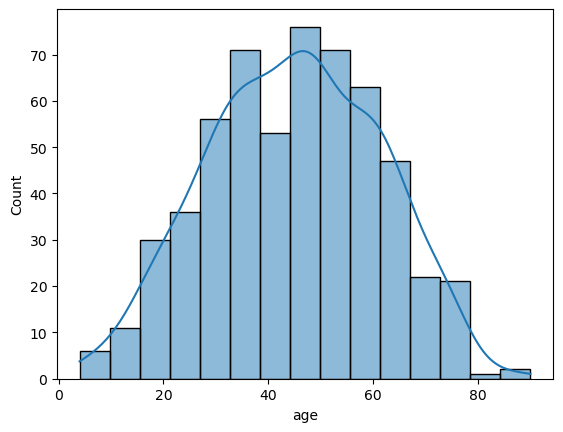

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


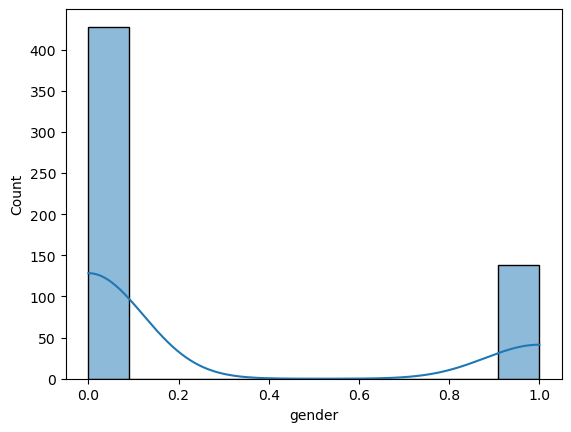

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


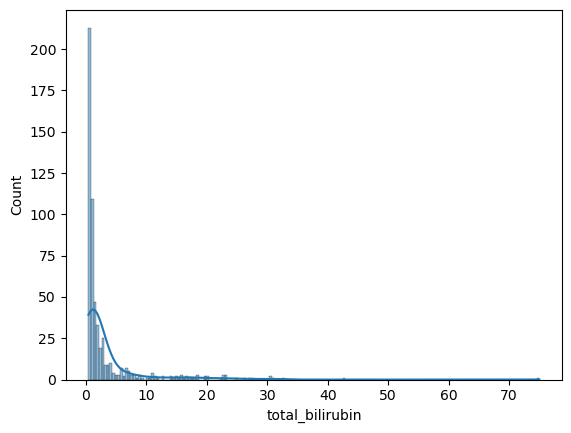

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


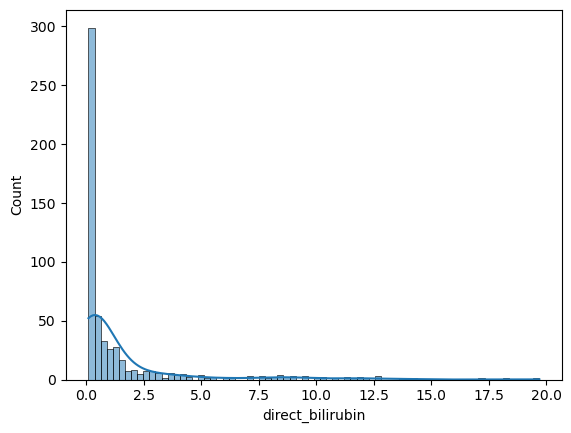

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


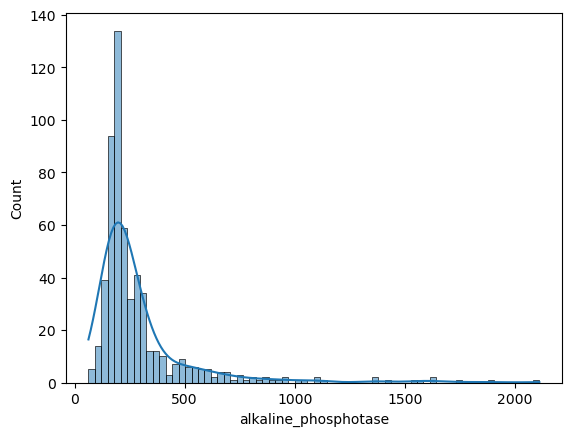

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


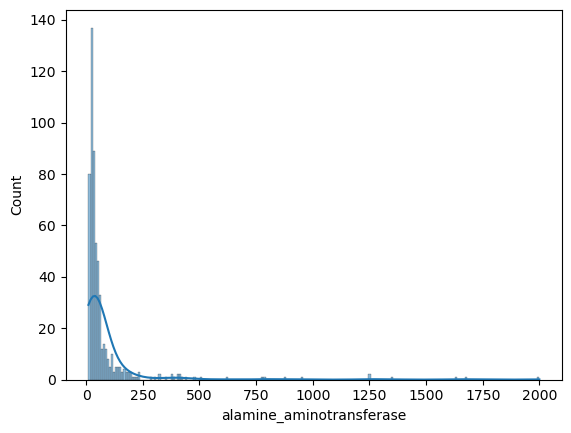

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


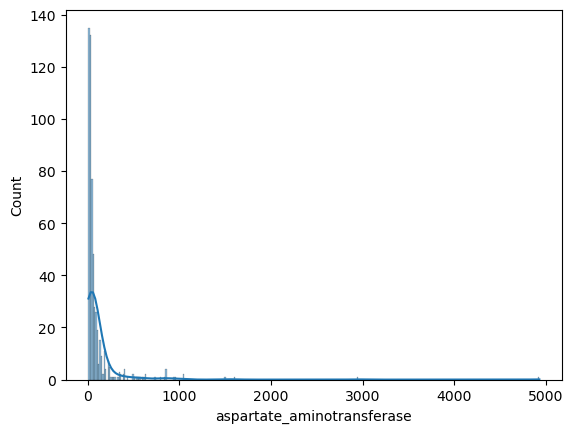

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


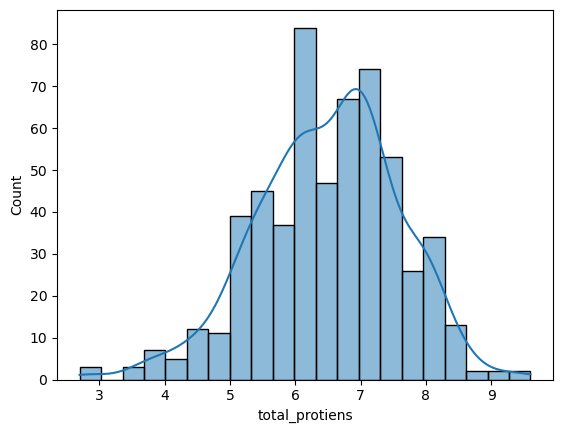

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


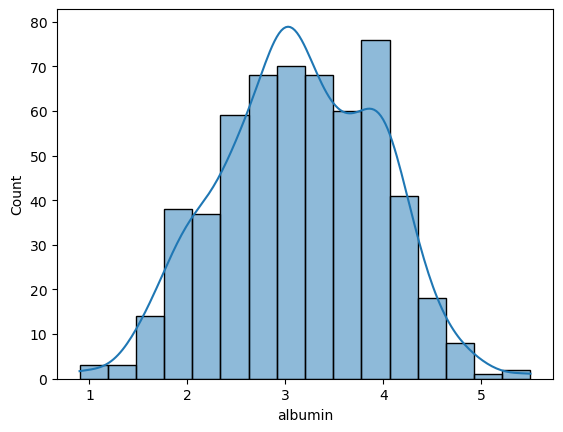

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


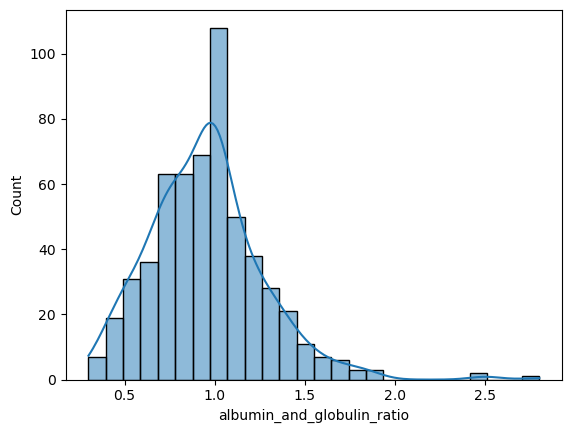

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


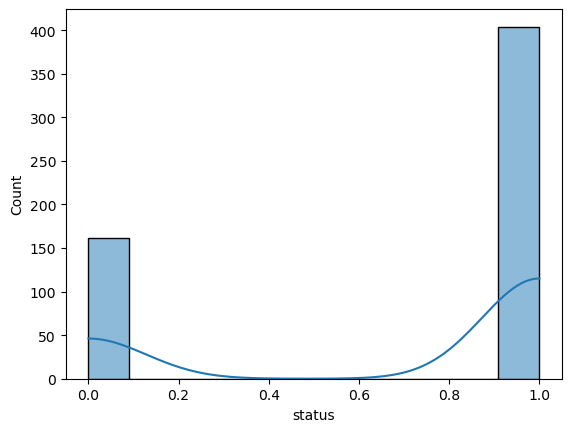

In [23]:
#EDA
#univariate_numeric
for col in liver_df:
    sb.histplot(data=liver_df,x=col,kde=True)
    plt.show()

In [24]:
#split numeric/categoric columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

In [25]:
#replace 2 to 0
df['status'] = df['status'].replace({2: 'No', 1: 'Yes'})

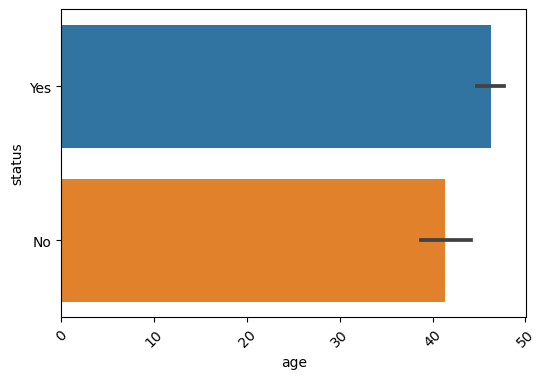

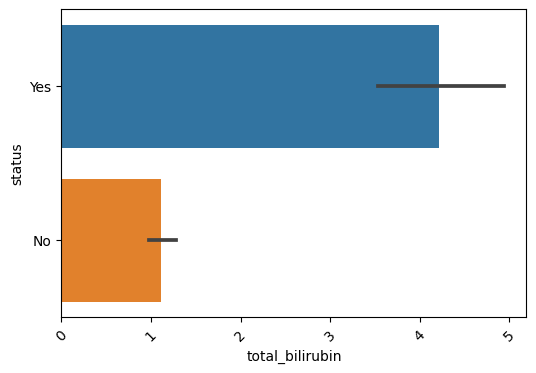

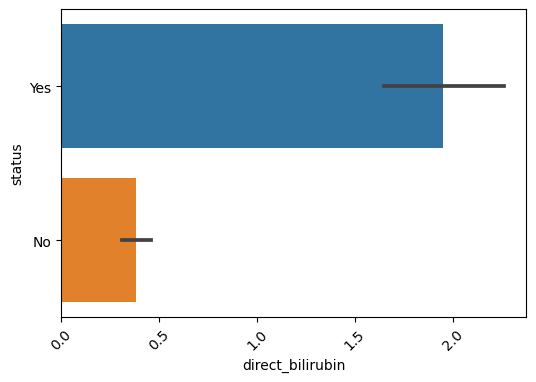

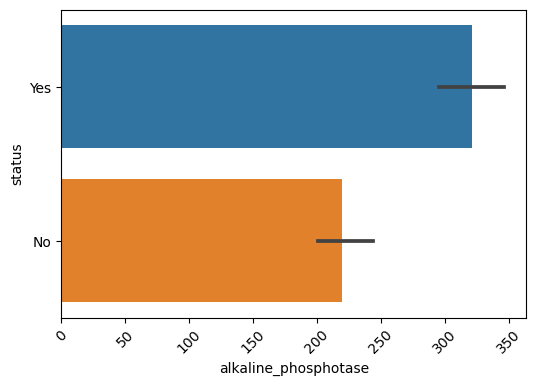

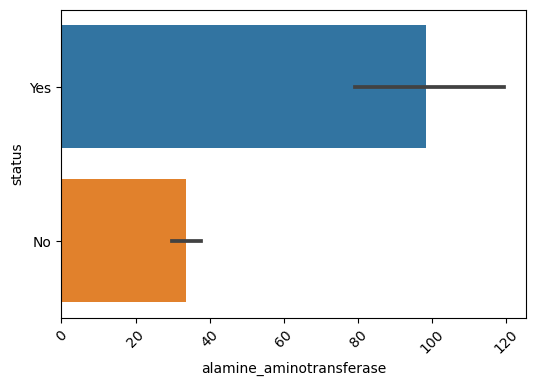

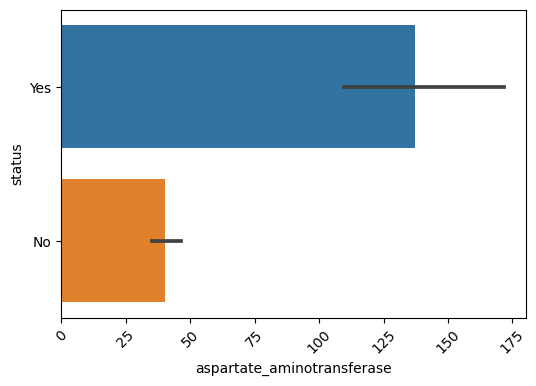

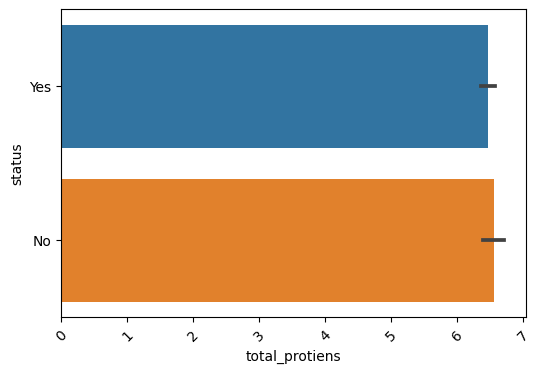

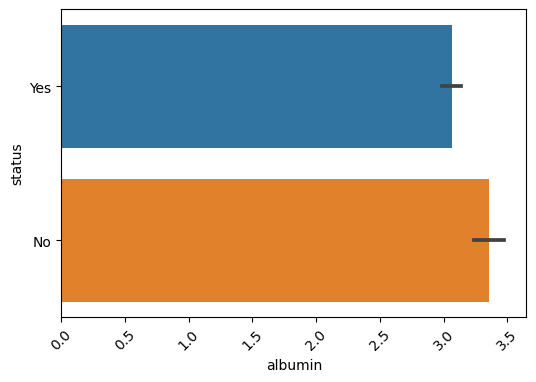

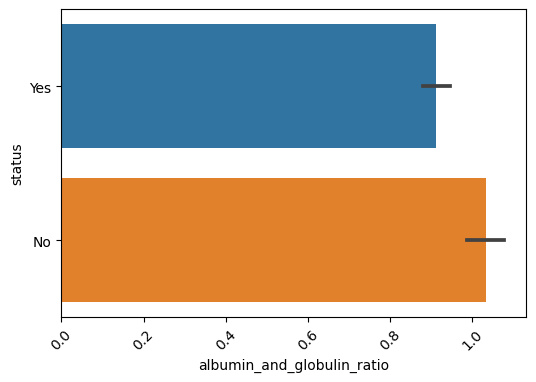

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 600x400 with 0 Axes>

In [26]:
#bivariate
#numeric Vs categoric
for col in num_col: 
    plt.figure(figsize=(6, 4))
    sb.barplot(data=df, x=col,y='status')
    plt.xticks(rotation=45)
    plt.show()

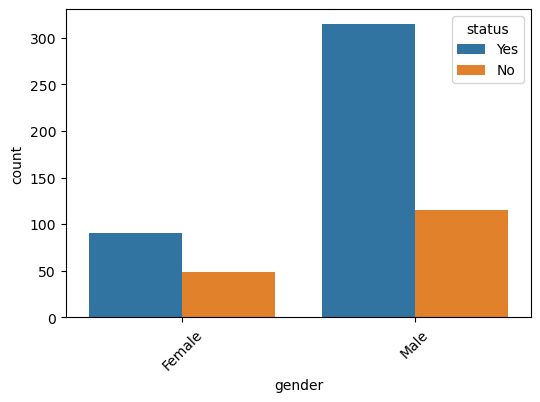

In [27]:
#categoric Vs categorical
for col in cat_col: 
    plt.figure(figsize=(6, 4))
    sb.countplot(data=df, x=col,hue='status')
    plt.xticks(rotation=45)
    plt.show()

In [28]:
#multivariate
liver_df.corr()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,status
age,1.000000,-0.057542,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,0.133821
gender,-0.057542,1.000000,-0.089068,-0.100448,0.024879,-0.083336,-0.080593,0.092049,0.093208,0.005611,-0.077396
total_bilirubin,0.010704,-0.089068,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,0.224467
direct_bilirubin,0.006268,-0.100448,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,0.250926
alkaline_phosphotase,0.080085,0.024879,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,0.186057
alamine_aminotransferase,-0.084319,-0.083336,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,0.161617
aspartate_aminotransferase,-0.017352,-0.080593,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,0.151009
total_protiens,-0.195893,0.092049,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,-0.036443
albumin,-0.269448,0.093208,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,-0.165273
albumin_and_globulin_ratio,-0.215967,0.005611,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,-0.171402


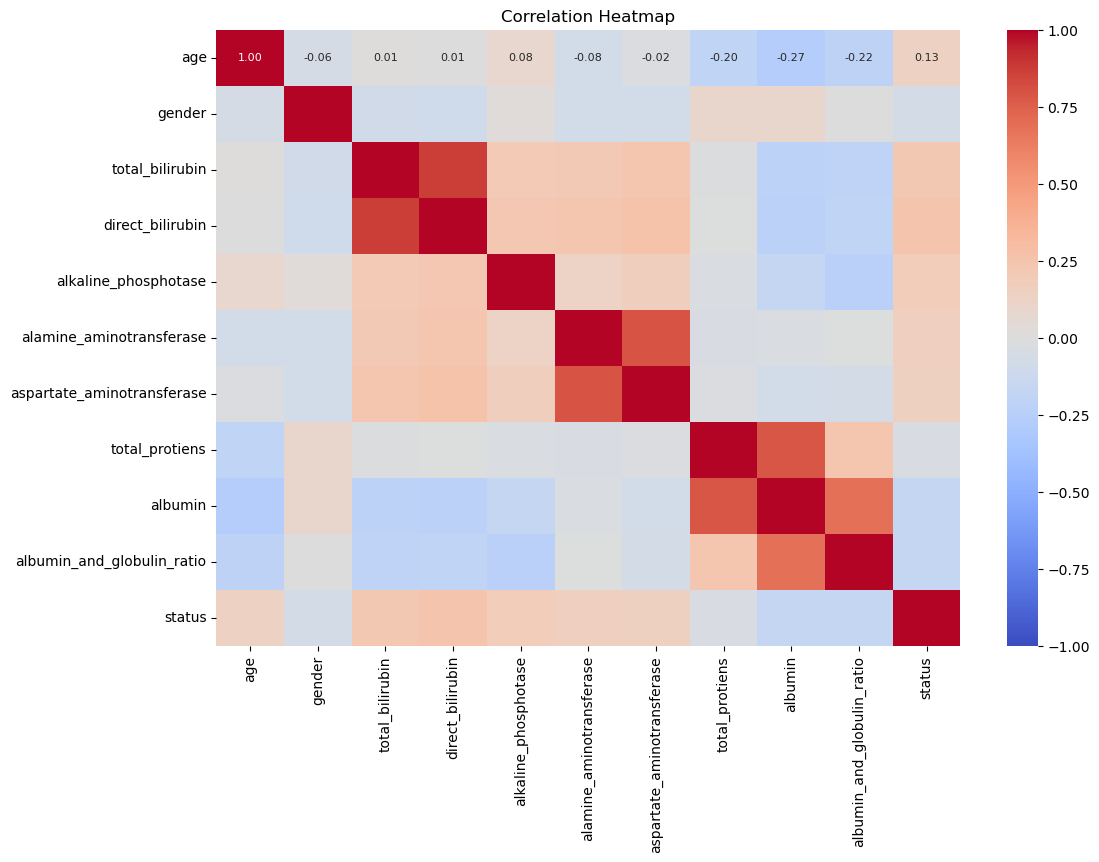

In [29]:
plt.figure(figsize=(12,8)) 
sb.heatmap(liver_df.corr(), cmap="coolwarm", annot=True, fmt=".2f", annot_kws={"size": 8}, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [30]:
#Model

In [31]:
x = liver_df.drop('status', axis = 1)
y = liver_df['status']

In [32]:
#split data to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [33]:
#RFC
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
# Get feature importance
rf_importances = rfc.feature_importances_

In [35]:
# Convert to DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': rf_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

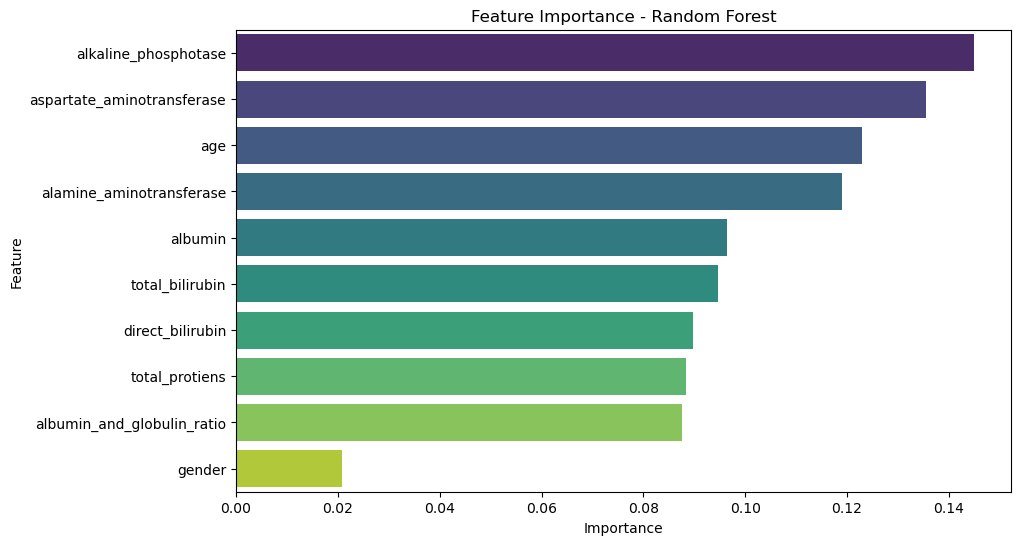

In [36]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.show()

In [37]:
liver_df['status'].value_counts()

status
1    404
0    162
Name: count, dtype: int64

In [38]:
sx_ = liver_df.drop(columns=['status'])
sy_ = liver_df['status']

In [47]:
#SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_osampled, y_osampled = smote.fit_resample(sx_, sy_)

In [48]:
liver_df_smote = pd.DataFrame(x_osampled, columns=sx_.columns)
liver_df_smote['status'] = y_osampled

In [49]:
print(kidney_df_smote['status'].value_counts())

status
1    404
0    404
Name: count, dtype: int64


In [82]:
X1 = liver_df_smote[['aspartate_aminotransferase','alkaline_phosphotase','alamine_aminotransferase','age','total_bilirubin',
                'albumin']]
y1 = liver_df_smote['status']

In [83]:
#split data to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state = 5)

In [84]:
#RFC

rfc = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight="balanced")
rfc.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5)

In [85]:
rfc_acc = accuracy_score(y_test, rfc.predict(x_test))
rfc_acc

0.7469135802469136

In [86]:
accuracy_score(y_train, rfc.predict(x_train))

0.8374613003095975

In [87]:
#DTC
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight="balanced",max_depth=5, min_samples_split=10, min_samples_leaf=5)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10)

In [88]:
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))
print(dtc_acc)

print(accuracy_score(y_train, dtc.predict(x_train)))

print(confusion_matrix(y_test, dtc.predict(x_test)))

print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(x_test))}")

0.7160493827160493
0.7894736842105263
[[72  6]
 [40 44]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.64      0.92      0.76        78
           1       0.88      0.52      0.66        84

    accuracy                           0.72       162
   macro avg       0.76      0.72      0.71       162
weighted avg       0.77      0.72      0.71       162



In [89]:
rfc_acc = accuracy_score(y_test, rfc.predict(x_test))
print(rfc_acc)

print(accuracy_score(y_train, rfc.predict(x_train)))

print(confusion_matrix(y_test, rfc.predict(x_test)))

print(f"Classification Report :- \n {classification_report(y_test, rfc.predict(x_test))}")

0.7469135802469136
0.8374613003095975
[[70  8]
 [33 51]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.68      0.90      0.77        78
           1       0.86      0.61      0.71        84

    accuracy                           0.75       162
   macro avg       0.77      0.75      0.74       162
weighted avg       0.78      0.75      0.74       162



In [90]:
#ADABC
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)

AdaBoostClassifier()

In [91]:
abc_acc = accuracy_score(y_test, abc.predict(x_test))
print(abc_acc)

print(accuracy_score(y_train, abc.predict(x_train)))

print(confusion_matrix(y_test, abc.predict(x_test)))

print(f"Classification Report :- \n {classification_report(y_test, abc.predict(x_test))}")

0.7037037037037037
0.7724458204334366
[[67 11]
 [37 47]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.64      0.86      0.74        78
           1       0.81      0.56      0.66        84

    accuracy                           0.70       162
   macro avg       0.73      0.71      0.70       162
weighted avg       0.73      0.70      0.70       162



In [92]:
#GBC
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [93]:
gbc_acc = accuracy_score(y_test, gbc.predict(x_test))
print(gbc_acc)

print(accuracy_score(y_train, gbc.predict(x_train)))

print(confusion_matrix(y_test, gbc.predict(x_test)))

print(f"Classification Report :- \n {classification_report(y_test, gbc.predict(x_test))}")

0.7407407407407407
0.8931888544891641
[[65 13]
 [29 55]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.69      0.83      0.76        78
           1       0.81      0.65      0.72        84

    accuracy                           0.74       162
   macro avg       0.75      0.74      0.74       162
weighted avg       0.75      0.74      0.74       162



In [94]:
#XGBC
xgbc = XGBClassifier(n_estimators=500, eval_metric="logloss")
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [95]:
xgbc_acc = accuracy_score(y_test, xgbc.predict(x_test))
print(xgbc_acc)

print(accuracy_score(y_train, xgbc.predict(x_train)))

print(confusion_matrix(y_test, xgbc.predict(x_test)))

print(f"Classification Report :- \n {classification_report(y_test, xgbc.predict(x_test))}")

0.7962962962962963
1.0
[[67 11]
 [22 62]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        78
           1       0.85      0.74      0.79        84

    accuracy                           0.80       162
   macro avg       0.80      0.80      0.80       162
weighted avg       0.80      0.80      0.80       162



In [96]:
#LBGC
lgbc = LGBMClassifier()
lgbc.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 320, number of negative: 326
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 744
[LightGBM] [Info] Number of data points in the train set: 646, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495356 -> initscore=-0.018576
[LightGBM] [Info] Start training from score -0.018576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier()

In [97]:
lgbc_acc = accuracy_score(y_test, lgbc.predict(x_test))
print(lgbc_acc)

print(accuracy_score(y_train, lgbc.predict(x_train)))

print(confusion_matrix(y_test, lgbc.predict(x_test)))

print(f"Classification Report :- \n {classification_report(y_test, lgbc.predict(x_test))}")

0.7901234567901234
1.0
[[66 12]
 [22 62]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.75      0.85      0.80        78
           1       0.84      0.74      0.78        84

    accuracy                           0.79       162
   macro avg       0.79      0.79      0.79       162
weighted avg       0.80      0.79      0.79       162



In [98]:
#KNN
knnc = KNeighborsClassifier()
knnc.fit(x_train, y_train)

KNeighborsClassifier()

In [99]:
knnc_acc = accuracy_score(y_test, knnc.predict(x_test))
print(knnc_acc)

print(accuracy_score(y_train, knnc.predict(x_train)))

print(confusion_matrix(y_test, knnc.predict(x_test)))

print(f"Classification Report :- \n {classification_report(y_test, knnc.predict(x_test))}")

0.6851851851851852
0.8281733746130031
[[69  9]
 [42 42]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.62      0.88      0.73        78
           1       0.82      0.50      0.62        84

    accuracy                           0.69       162
   macro avg       0.72      0.69      0.68       162
weighted avg       0.73      0.69      0.67       162



In [100]:
#NBC
nbc = GaussianNB()
nbc.fit(x_train, y_train)

GaussianNB()

In [101]:
nbc_acc = accuracy_score(y_test, nbc.predict(x_test))
print(nbc_acc)

print(accuracy_score(y_train, nbc.predict(x_train)))

print(confusion_matrix(y_test, nbc.predict(x_test)))

print(f"Classification Report :- \n {classification_report(y_test, nbc.predict(x_test))}")

0.6728395061728395
0.7089783281733746
[[75  3]
 [50 34]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.60      0.96      0.74        78
           1       0.92      0.40      0.56        84

    accuracy                           0.67       162
   macro avg       0.76      0.68      0.65       162
weighted avg       0.77      0.67      0.65       162



In [102]:
#SVC
svc = SVC(kernel='rbf', class_weight="balanced", probability=True)
svc.fit(x_train, y_train)

SVC(class_weight='balanced', probability=True)

In [103]:
svc_acc = accuracy_score(y_test, svc.predict(x_test))
print(svc_acc)

print(accuracy_score(y_train, svc.predict(x_train)))

print(confusion_matrix(y_test, svc.predict(x_test)))

print(f"Classification Report :- \n {classification_report(y_test, svc.predict(x_test))}")

0.6419753086419753
0.6842105263157895
[[67 11]
 [47 37]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.59      0.86      0.70        78
           1       0.77      0.44      0.56        84

    accuracy                           0.64       162
   macro avg       0.68      0.65      0.63       162
weighted avg       0.68      0.64      0.63       162



In [104]:
# Model Comparison

models = pd.DataFrame({
    'Model':['Decision Tree Classifier', 'Random Forest Classifier', 'Ada Boost Classifier', 'Gradient Boost Classifier',
             'XgBoost Classifier', 'Light GBoost Classifier','K-Nearest Neighbors Classifier','Neive Bayes Classifier','Support Vector Classifier'],
    'Score':[dtc_acc, rfc_acc, abc_acc, gbc_acc, xgbc_acc, lgbc_acc, knnc_acc, nbc_acc, svc_acc]
})

models.sort_values(by='Score', ascending = False)

,Model,Score
4,XgBoost Classifier,0.796296
5,Light GBoost Classifier,0.790123
1,Random Forest Classifier,0.746914
3,Gradient Boost Classifier,0.740741
0,Decision Tree Classifier,0.716049
2,Ada Boost Classifier,0.703704
6,K-Nearest Neighbors Classifier,0.685185
7,Neive Bayes Classifier,0.672840
8,Support Vector Classifier,0.641975


In [105]:
#model pickle

In [106]:
filename='liver_model_v2.pkl'

In [107]:
import pickle
pickle.dump(lgbc, open(filename,'wb'))

In [108]:
loaded_model=pickle.load(open('liver_model_v2.pkl','rb'))

In [64]:
for column in x.columns:
  print(column)

age
gender
total_bilirubin
direct_bilirubin
alkaline_phosphotase
alamine_aminotransferase
aspartate_aminotransferase
total_protiens
albumin
albumin_and_globulin_ratio
